In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import sys
print(sys.version)
import warnings

3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 12:22:00) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


# Questão 1
Processo de Markov com 3 possíveis estados {0, 1, 2} e matriz de transição M :

\begin{array}{cccc}
   0.50 & 0.25 & 0.25 \\
   0.25 & 0.50 & 0.25 \\ 
   0.25 & 0.25 & 0.50 \\
  \end{array}

### Item A.

In [19]:
M = np.asarray(((0.5,0.25,0.25), (0.25,0.5,0.25), (0.25,0.25,0.5) ))
p0 = np.asarray((0.3, 0.4, 0.3))

M3 = np.linalg.matrix_power(M,2)
p3 = np.dot(M3,p0)
p3

array([ 0.33125,  0.3375 ,  0.33125])

### Item B.

In [44]:
def move(state, M, randomNb, printState=False):
    acc = 0
    if printState:
        print(M[:,state])
        
    for i in range(len(M[:,state])):
        acc = acc + M[i,state]
        if randomNb < acc:
            return i

state0 = 1
print('X(0) = {:d}\n'.format(state0))

state1 = move(state0, M, np.random.rand(), True)
print('X(1) = {:d}\n'.format(state1))

state2 = move(state1, M, np.random.rand(), True)
print('X(2) = {:d}\n'.format(state2))

state3 = move(state2, M, np.random.rand(), True)
print('X(3) = {:d}\n'.format(state3))

X(0) = 1

[ 0.25  0.5   0.25]
X(1) = 0

[ 0.5   0.25  0.25]
X(2) = 2

[ 0.25  0.25  0.5 ]
X(3) = 2



### Item C.

In [163]:
def moveNumpy(state, M, randomNb, printState=False):
    if printState:
        print(M[:,state])
        
    upperBound = M[:,state].cumsum(0)
    lowerBound = upperBound - M[:,state]
    
    greaterThanLowerBound = np.greater_equal(randomNb,lowerBound[:,np.newaxis])
    lowerThanUpperBound = np.less_equal(randomNb, upperBound[:,np.newaxis])

    newStateBool = np.logical_and(greaterThanLowerBound, lowerThanUpperBound)
    newState = np.where(newStateBool.T)[-1]
    
    return newState
       
def SimulateMarkov(M, nbStates, steps, trials):
    history = np.zeros((trials, steps+1))
    randomNbs = np.random.rand(trials, steps)
    state = np.random.randint(nbStates, size=trials)
    history[:,0] = state
    
    for step in range(steps):
        state = move(state, M, randomNbs[:, step])
        history[:,step+1] = state
    
    return history

markovChains = SimulateMarkov(M, 3, 3, int(1e7))
print('done')

done


### Item D

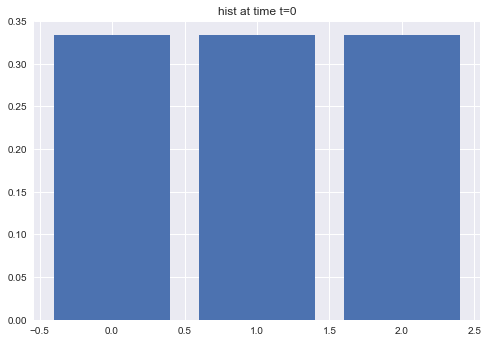

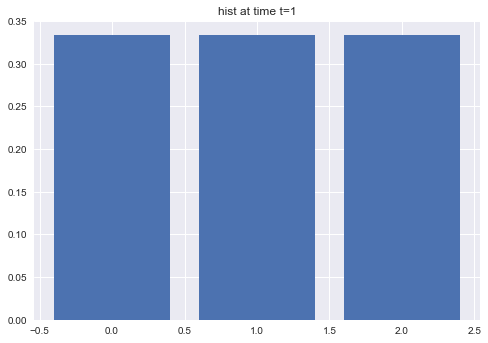

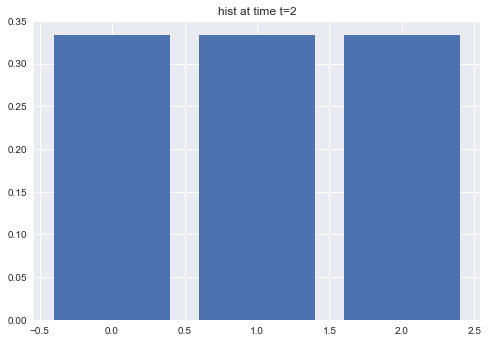

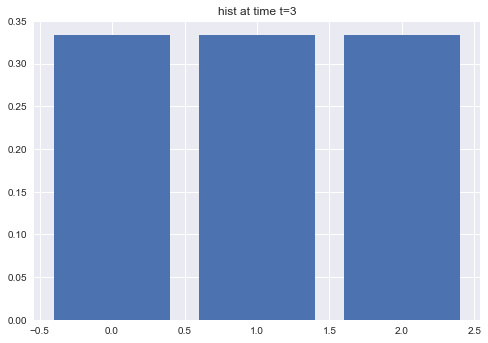

In [207]:
for time in range(markovChains.shape[1]):
    hist, bins = np.histogram(markovChains[:,time], bins=(0,1,2,3))
    width = 0.5 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2 - 0.5
    plt.bar(center, hist/markovChains.shape[0], align='center')
    plt.title('hist at time t={:d}'.format(time))
    plt.show()

# Questão 2

### Item A

In [93]:
N = 5
Jx = np.asarray((0.5, 0.2, 0.3, 0.1, 0.4))
T = 0.1

# calculate exp(-delta_J/T) pairwise
index = np.mgrid[0:N,0:N]
M = np.exp( ( Jx[index[1].ravel()] - Jx[index[0].ravel()] ) / T )

# force transition prob to 1 for lower energy states (delta_J < 1 -> exp(.) > 1)
M[M > 1] = 1 
M = M.reshape((N,N))

# prob to randomly pick a givn new state
M = M/(N)

# prob to remain in the same state is the remaining prob
M = M * (np.ones_like(M) - np.eye(M.shape[0]))
M[M == 0] = 1 - M.sum(0)

print(M)

[[ 0.2         0.00995741  0.02706706  0.00366313  0.07357589]
 [ 0.2         0.68939964  0.2         0.07357589  0.2       ]
 [ 0.2         0.07357589  0.49935706  0.02706706  0.2       ]
 [ 0.2         0.2         0.2         0.88573651  0.2       ]
 [ 0.2         0.02706706  0.07357589  0.00995741  0.32642411]]


### Item B

In [16]:
stateVector = np.arange(5)+1

stateIndex0 = 0
print('X(0) = {:d}\n'.format(stateVector[stateIndex0]))

stateIndex1 = move(stateIndex0, M,np.random.rand(), True)
# print(stateVector[stateIndex1])
print('X(1) = {:d}\n'.format(stateVector[stateIndex1]))

stateIndex2 = move(stateIndex1, M, np.random.rand(), True)
# print(stateVector[stateIndex2])
print('X(2) = {:d}\n'.format(stateVector[stateIndex2]))

stateIndex3 = move(stateIndex2, M, np.random.rand(), True)
# print(stateVector[stateIndex3])
print('X(3) = {:d}\n'.format(stateVector[stateIndex3]))

X(0) = 1

[ 0.2  0.2  0.2  0.2  0.2]
X(1) = 2

[ 0.00995741  0.68939964  0.07357589  0.2         0.02706706]
X(2) = 2

[ 0.00995741  0.68939964  0.07357589  0.2         0.02706706]
X(3) = 2



### Item C

In [19]:
vals, vecs = np.linalg.eig(M)
val = vals[0]
vec = -vecs[:,0]
vec = vec/vec.sum()
print('Vetor invariante da matrix de transição M (autovetor de autovalor 1):')
print(vec)
print('\nAplicando a matriz M ao vetor:')
print(np.dot(M,vec))

Vetor invariante da matrix de transição M (autovetor de autovalor 1):
[ 0.01165623  0.23412166  0.08612854  0.63640865  0.03168492]

Aplicando a matriz M ao vetor:
[ 0.01165623  0.23412166  0.08612854  0.63640865  0.03168492]


### Item D

In [26]:
gibbs = np.exp(-Jx/T)
gibbs = gibbs/gibbs.sum()
print('Distribuição de Boltzman-Gibbs associada a função de custo Jx na temperatura T=0.1:')
print(gibbs)

Distribuição de Boltzman-Gibbs associada a função de custo Jx na temperatura T=0.1:
[ 0.01165623  0.23412166  0.08612854  0.63640865  0.03168492]


A distribuição obtida é igual ao vetor invariante a matriz de transição M à mesma temperatura T. Isso ocorre pois a matriz M é ela própria construída a partir da distribuição de Gibbs: a probabilidade de mudança de um estado para o outro é unicamente determinada pela diferença do custo entre ambos estados, sendo essa submetida à distribuição de Gibbs exp(-x/T).

Qualquer distribuição f(x) estritamente positiva e decrescente escolhida obteria esse mesmo resultado: vetor invariantes iguais aos fatores da distribuição?

### Item E

/home/lucas.cinelli/miniconda3/envs/masters/lib/python3.6/site-packages/ipykernel/__main__.py:26: RuntimeWarning: divide by zero encountered in true_divide


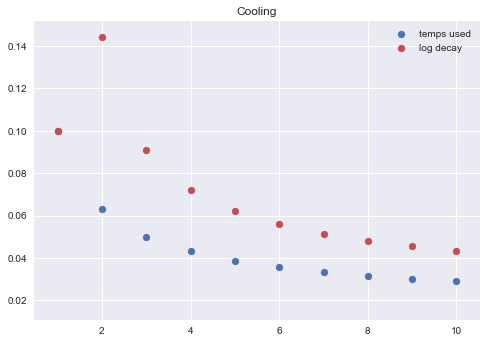

   iter		log(iter)   temps used       ratio
[[  1.           0.1          0.1          1.        ]
 [  2.           0.1442695    0.0631       2.28636298]
 [  3.           0.09102392   0.05         1.82047845]
 [  4.           0.07213475   0.0431       1.67366014]
 [  5.           0.06213349   0.0387       1.60551663]
 [  6.           0.05581106   0.0356       1.56772648]
 [  7.           0.05138983   0.0333       1.54323827]
 [  8.           0.04808983   0.0315       1.52666142]
 [  9.           0.04551196   0.0301       1.51202529]
 [ 10.           0.04342945   0.0289       1.50274907]]


X0 = 3.00
J(X0) = 0.10000



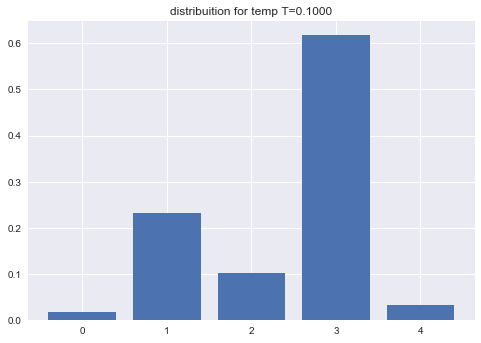

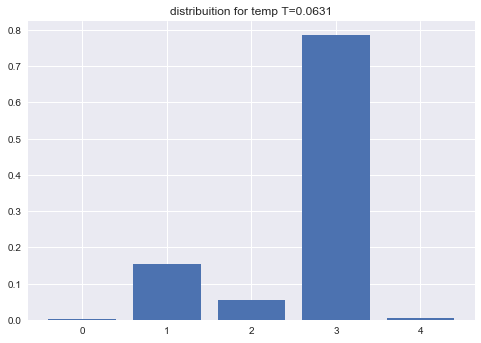

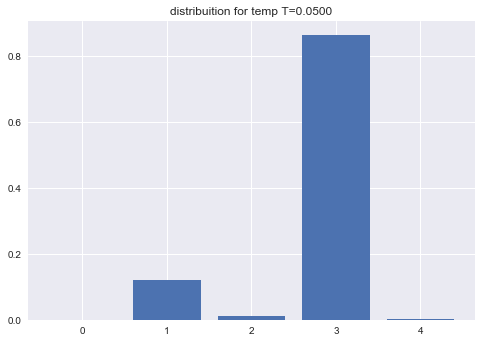

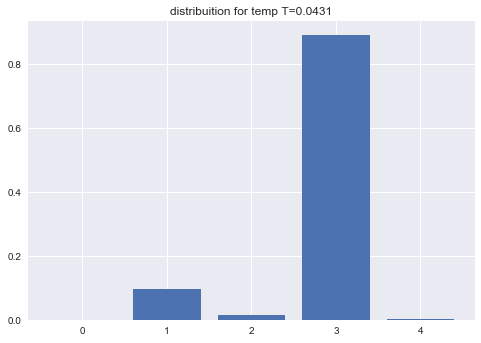

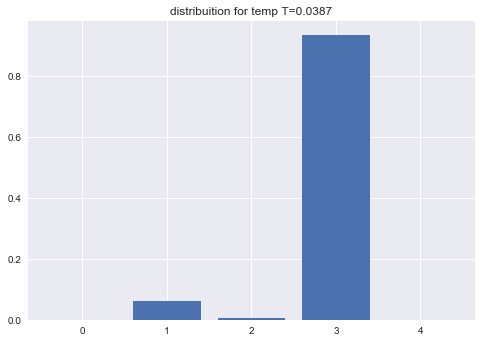

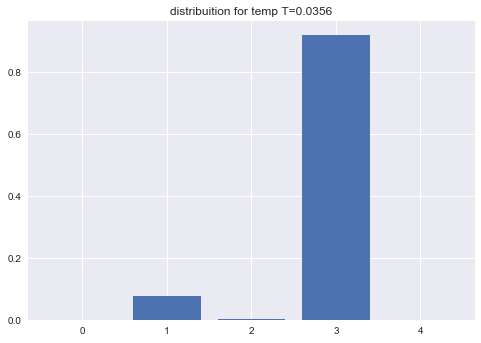

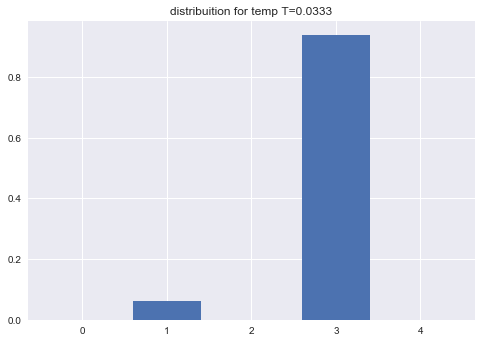

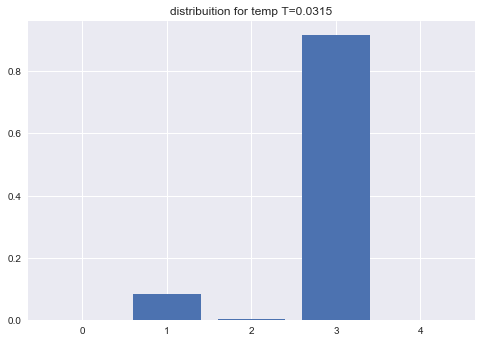

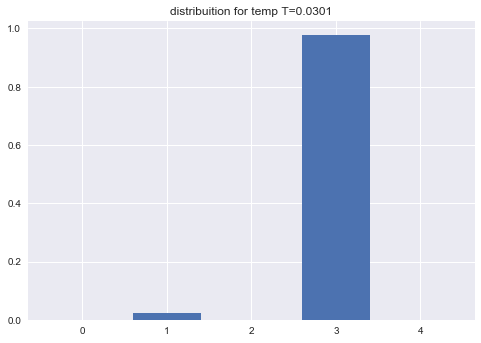

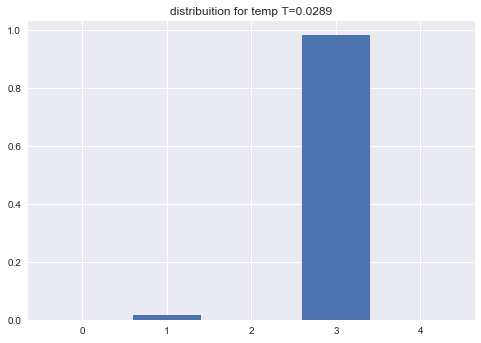

Xmin = 3.00
J(Xmin) = 0.10000


In [153]:
# use the values of Jx defined previously
def energy(i):
    return Jx[int(i)]

def decay(TO, k):
    if k == 0:
        return T0
    return T0 / np.log(1+k)

def uniformDiscretePdf(k,maxVal):
    return np.random.randint(k, maxVal)

def plotHistogram(data,nbStates, title):
    hist, bins = np.histogram(data, bins=np.arange(nbStates+1))
    width = 0.5 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2 - 0.5
    plt.bar(center, hist/data.shape[0], align='center')
    plt.title(title)
    plt.show()

# use sequence of T given in the list
tempList = np.asarray((0.1, 0.0631, 0.05, 0.0431, 0.0387, 0.0356, 0.0333, 0.0315, 0.0301, 0.0289))

# grafico do recozimento
x = np.arange(len(tempList))+1
y=tempList[0]/np.log(x)
y[0]=tempList[0]
plt.scatter(x, tempList, label='temps used')
plt.scatter(x, y, color='r', label ='log decay')
plt.title('Cooling')
plt.legend()
plt.show()
print('   iter\t\tlog(iter)   temps used       ratio')
print(np.dstack((x, y,tempList, y/tempList)).squeeze())
print('\n')

N = int(1e3) # numero de iter por temperatura
K = len(tempList) # numero de temps a ser usada
n = 0
k = 0
eps = 0.2
T = tempList[k] # temperatura inicial
sizeHistory = 1000 # tamanho do historico a ser guardado
history = np.zeros(sizeHistory)
end = False

Xmin = X = X0 = uniformDiscretePdf(1, len(Jx))
Jmin = J = J0 = energy(X0)

print('X0 = {:1.2f}'.format(Xmin))
print('J(X0) = {:1.5f}'.format(Jmin))
print()

# TODO: plot histogram at the end of each temp
while not end:
    n = n + 1

    Xn = (X + uniformDiscretePdf(1, len(Jx)))%len(Jx)
    Jn = energy(Xn)
    if np.exp(-(Jn-J)/T) > np.random.rand(1):
        X = Xn
        J = Jn
    if Jn < Jmin:
        Xmin = Xn
        Jmin = Jn

    # keep record of last sizeHistory states of X
    if (N - n%N) <= sizeHistory:
        history[(n%N)-N+sizeHistory] = X
        
    #cooling
    if n % N == 0:
        k = k + 1
        plotHistogram(history, len(Jx), 'distribuition for temp T={:1.4f}'.format(T))
        if k == K:
            end = True
        else:
            T = tempList[k]

print('Xmin = {:1.2f}'.format(Xmin))
print('J(Xmin) = {:1.5f}'.format(Jmin))

Para cada temperatura T especificada exibe-se a distribução obtida a partir das 1000 últimas iterações. Percebe-se claramente que para a primeira temperatura T=0.1 obtem-se uma distribuição muito similar àquela obtida no item C através do cálculo do autovetor da matriz de transição M para essa mesma temperatura T=0.1, o que indica que de fato a distribuição obtida pelo algortimo de metrópolis convergiu para a distribuição estacionária do sistema para a temperatura T=0.1. O mesmo ocorre para as demais temperaturas com as distribuições progressivamente se concentrando nas regiões de mínimo do sistema: x=1 (mínimo local) e x=3 (mínimo global).

A curva de temperatura usada (determinada pela lista fornecida) difere do que se obtém através da fórmula de decaimento logarítimico $1/\log(k+1)$ para a qual a convergência do algoritmo de SA é garantida. No entanto, o algoritmo claramente converge em direção ao mínimo global.

# Questão 3